# Linear regression/своя линейная регрессия с перемножением матриц 

# (Лучкин ИУ6-51Б, Павловский ИУ6-51Б, Левашова ИУ6-53Б)

## 1) импортируем библиотеки

In [1]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns

import os # для обработки пути к данным как на Unix-системах, так и на Windows

## 2) получаем датасет

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 3) собираем фичи и таргет данные

In [4]:
y = np.array(df['MEDV'])
y = y.reshape((y.shape[0], 1))
y.shape
X = np.array(df.loc[:, 'CRIM':'LSTAT'].values)
X.shape

(506, 13)

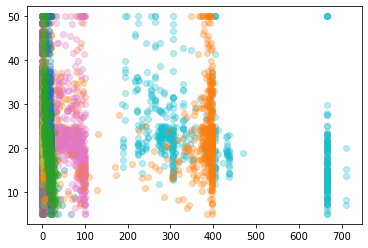

In [5]:
plt.plot(X, y, 'o', alpha=0.3)

## 4) создаём тестовую группу

In [6]:
TRAIN_TEST_RATIO = 0.8 # доля экземпляров в тренировочном датасете по отношению к количеству всех экземпляров в исходном датасете

In [7]:
train_number = round(X.shape[0] * TRAIN_TEST_RATIO) # количество экземпляров в тренировочном датасете

X_train = X[:train_number] # избегание ошибки с одномерным массивом
y_train = y[:train_number]

X_test = X[train_number:] # избегание ошибки с одномерным массивом
y_test = y[train_number:]

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (405, 13)
y_train.shape: (405, 1)
X_test.shape: (101, 13)
y_test.shape: (101, 1)


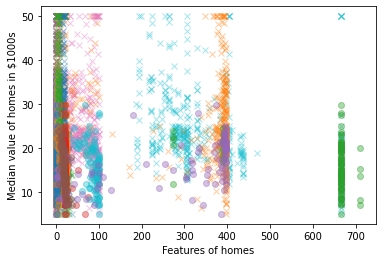

In [8]:
plt.plot(X_train, y_train, 'x', label="Train", alpha=0.4) # тренировочные данные крестиками
plt.plot(X_test, y_test, 'o', label="Train", alpha=0.4) # тестовые данные кружками
plt.xlabel("Features of homes") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.show() # отображение графика

## 5) создаём класс нашей модели

In [9]:
class LinearRegression:

  def __init__(self, lr, n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs  

  def loss_gradient_w(self, y_pred, y, x):    
    return (2 / self.m) * np.dot(x.T, (y_pred - y))

  def loss_gradient_b(self, y_pred, y):
    return 2 * np.sum(y_pred - y) / self.m

  def fit(self, x, y):
    self.m, self.n = x.shape
    self.w = np.zeros((self.n,1))
    self.b = 0
    for i in range(self.n_epochs):
      self.w -= self.lr * self.loss_gradient_w(self.predict(x), y, x)
      self.b -= self.lr * self.loss_gradient_b(self.predict(x), y)
      #print(f"MSE: {self.mse(y, self.predict(x))}")

  def predict(self, x):
    return np.dot(x, self.w) + self.b

## 6) создаём и обучаем нашу модель на тестовой группе и выводим MSE

In [10]:
print(X_train.shape)
print(y_train.shape)

(405, 13)
(405, 1)


In [11]:
model = LinearRegression(10e-7, 3000000)
model.fit(X_train, y_train)
print(model.w)
def mse(y, y_pred):
    return np.sum(np.square(y - y_pred))/ y.shape[0]
print(f'\033[1;32m final MSE = {mse(y_test, model.predict(X_test))}')

[[-2.09153939e-01]
 [ 4.84654774e-02]
 [ 3.07742901e-02]
 [ 8.80715941e-01]
 [ 2.30144461e-01]
 [ 5.86761417e+00]
 [-9.95762366e-04]
 [-9.17299318e-01]
 [ 3.50418267e-01]
 [-1.35200718e-02]
 [-4.23413145e-01]
 [ 1.34215678e-02]
 [-4.95888347e-01]]
 final MSE = 30.652753795345923


## 7) демонстрируем качество предсказания данных у обученной модели

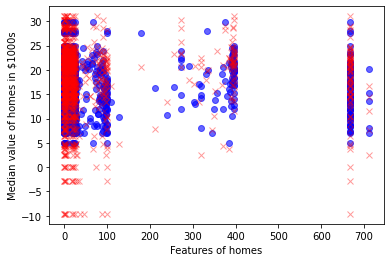

In [12]:
y_predict = model.predict(X_test)
plt.plot(X_test, y_test, 'bo', label='Train', alpha=0.6) # реальные цены
plt.plot(X_test, y_predict, 'rx', label='Test', alpha=0.4) # цены предсказанные моделью
plt.xlabel("Features of homes") # надпись по оси X
plt.ylabel("Median value of homes in $1000s") # надпись по оси Y
plt.show() # отображение графика

Уничтожил. Низвёл до атомов. Сам чуть не погиб, но дело сделано...